### sample one - modual one

In [ ]:
%reload_ext autoreload
%autoreload 2

from lib.backtest.strategy_one import backtest_strategy
from lib.performance_analysis import calculate_strategy_one_performance
from lib.backtest.backtest_adjusted import sensitivity_analysis_one
import pandas as pd

# 載入資料
df_original = pd.read_csv("../data/TPE-sample1.csv", encoding="utf-8")
print(f"資料載入成功，共 {len(df_original)} 筆。")

results_df = sensitivity_analysis_one(
    df_original=df_original,
    backtest_func=backtest_strategy,
    performance_func=calculate_strategy_one_performance,
    param_ranges={
        'ma_period': (10, 15),
        'bb_period': (20, 40),
        'bb_std': (1.0, 3.0),
        'drop_threshold': (0.5, 0.8)
    },
    iterations=500,
)
results_df

資料載入成功，共 1261 筆。
準備進行 500 次隨機參數測試...


執行進度:   0%|          | 0/500 [00:00<?, ?it/s]

,ma_period,bb_period,bb_std,drop_threshold,最終權益 (Mark-to-Market),淨利或淨損 (已實現),最大回撤 (MDD),總獲利 (已實現),總損失 (已實現),總交易次數,賺錢交易次數,虧錢交易次數,勝率,單次交易最大獲利,單次交易最大損失,獲利交易中的平均獲利,損失交易中的平均損失,賺賠比,最長的連續性獲利的次數,最長的連續性損失的次數
0,11,31,1.29,0.75,132.0,116.0,656.0,2087.0,-1971.0,56,18,38,32.14%,284.0,-134.0,115.944444,-51.868421,2.235357,3,7
1,15,21,1.32,0.75,-16.0,-32.0,912.0,2249.0,-2281.0,62,21,41,33.87%,289.0,-183.0,107.095238,-55.634146,1.924991,3,7
2,10,24,2.89,0.79,-18.0,-18.0,32.0,14.0,-32.0,2,1,1,50.00%,14.0,-32.0,14.000000,-32.000000,0.437500,1,1
3,11,23,1.43,0.70,31.0,31.0,932.0,1990.0,-1959.0,54,19,35,35.19%,261.0,-183.0,104.736842,-55.971429,1.871255,4,12
4,11,29,2.89,0.51,46.0,46.0,29.0,46.0,0.0,2,2,0,100.00%,32.0,0.0,23.000000,0.000000,inf,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,15,36,1.58,0.55,334.0,318.0,515.0,1424.0,-1106.0,32,11,21,34.38%,251.0,-129.0,129.454545,-52.666667,2.457998,3,7
496,14,40,2.62,0.71,66.0,66.0,117.0,113.0,-47.0,4,3,1,75.00%,44.0,-47.0,37.666667,-47.000000,0.801418,3,1
497,11,35,1.34,0.78,-677.0,-693.0,1135.0,1576.0,-2269.0,55,12,43,21.82%,284.0,-148.0,131.333333,-52.767442,2.488908,2,10
498,10,21,2.90,0.67,124.0,124.0,29.0,124.0,0.0,2,2,0,100.00%,110.0,0.0,62.000000,0.000000,inf,2,0


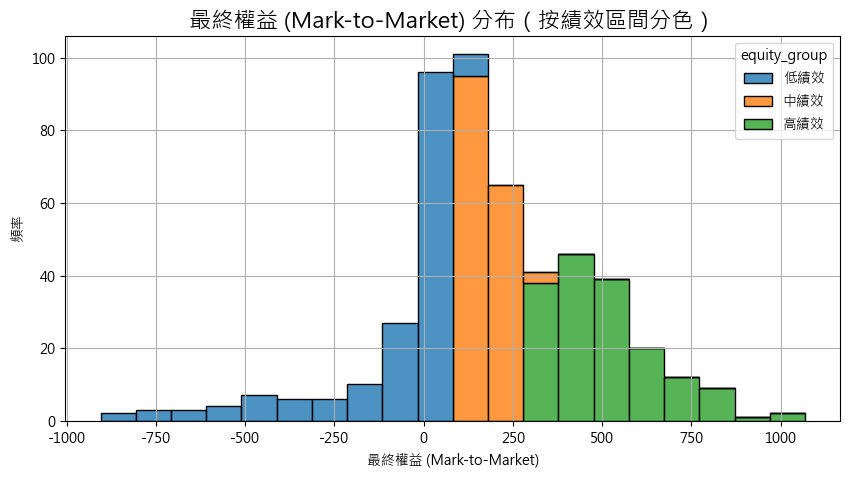

不同績效區間的策略參數中位數：


,ma_period,bb_period,bb_std,drop_threshold
equity_group,,,,
低績效,12.0,32.0,1.95,0.65
中績效,12.0,31.0,2.28,0.66
高績效,12.0,26.0,1.83,0.64


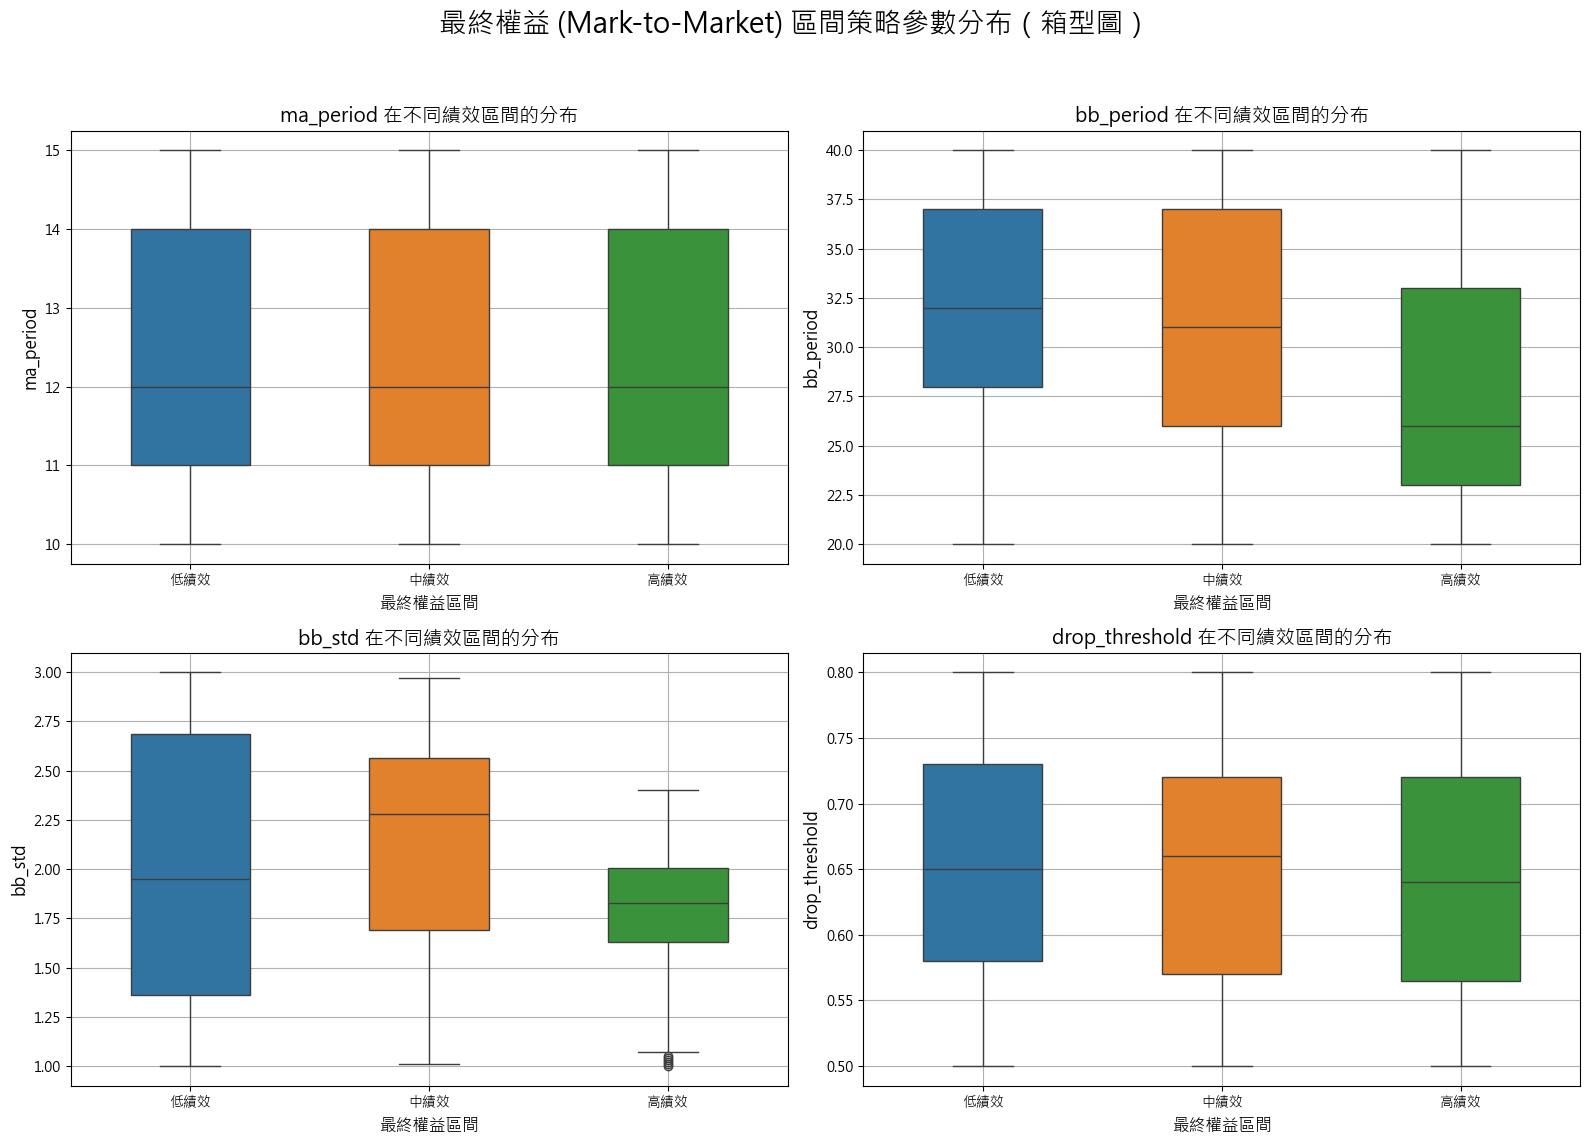

In [4]:
%reload_ext autoreload
%autoreload 2

from lib.backtest.backtest_adjusted import plot_strategy_sensitivity


plot_strategy_sensitivity(
    results_df,
    equity_col='最終權益 (Mark-to-Market)',
    param_cols=['ma_period','bb_period','bb_std','drop_threshold'],
    group_labels=['低績效','中績效','高績效'],
)


### sample one - moduel two

In [4]:
%reload_ext autoreload
%autoreload 2

from lib.backtest.strategy_two import backtest_strategy_two
from lib.performance_analysis import calculate_strategy_performance
from lib.backtest.backtest_adjusted import sensitivity_analysis_two
import pandas as pd

# 載入資料
df_original = pd.read_csv("../data/TPE-sample1.csv", encoding="utf-8")
print(f"資料載入成功，共 {len(df_original)} 筆。")

results_df = sensitivity_analysis_two(
    df_original=df_original,
    backtest_func=backtest_strategy_two,
    performance_func=calculate_strategy_performance,
    param_ranges = {
        'short_ma_period': (3, 10),
        'long_ma_period': (5, 20)
    },
    iterations=500,
)
results_df

資料載入成功，共 1261 筆。
準備進行 500 次隨機參數測試...


執行進度:   0%|          | 0/500 [00:00<?, ?it/s]

,short_ma_period,long_ma_period,最終權益 (Mark-to-Market),淨利或淨損 (已實現),最大回撤 (MDD),總獲利 (已實現),總損失 (已實現),總交易次數,賺錢交易次數,虧錢交易次數,勝率,單次交易最大獲利,單次交易最大損失,獲利交易中的平均獲利,損失交易中的平均損失,賺賠比,最長的連續性獲利的次數,最長的連續性損失的次數
0,7,16,622.0,606.0,834.0,2421.0,-1815.0,45,23,22,51.11%,357.0,-298.0,105.260870,-82.500000,1.275889,5,4
1,8,13,2218.0,2240.0,589.0,4194.0,-1954.0,50,30,20,60.00%,420.0,-220.0,139.800000,-97.700000,1.430911,7,5
2,7,17,541.0,525.0,797.0,2359.0,-1834.0,44,22,22,50.00%,383.0,-298.0,107.227273,-83.363636,1.286260,3,3
3,4,16,1769.0,1753.0,499.0,3168.0,-1415.0,51,30,21,58.82%,348.0,-190.0,105.600000,-67.380952,1.567208,6,4
4,5,13,1307.0,1291.0,896.0,3238.0,-1947.0,55,28,27,50.91%,332.0,-248.0,115.642857,-72.111111,1.603676,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,4,20,1040.0,1040.0,693.0,2307.0,-1267.0,40,24,16,60.00%,318.0,-205.0,96.125000,-79.187500,1.213891,5,4
496,10,11,2559.0,2516.0,661.0,5592.0,-3076.0,75,37,38,49.33%,930.0,-248.0,151.135135,-80.947368,1.867079,10,4
497,9,17,450.0,472.0,769.0,1780.0,-1308.0,39,21,18,53.85%,282.0,-221.0,84.761905,-72.666667,1.166448,9,5
498,10,12,2027.0,2011.0,745.0,4570.0,-2559.0,61,28,33,45.90%,864.0,-248.0,163.214286,-77.545455,2.104756,5,7


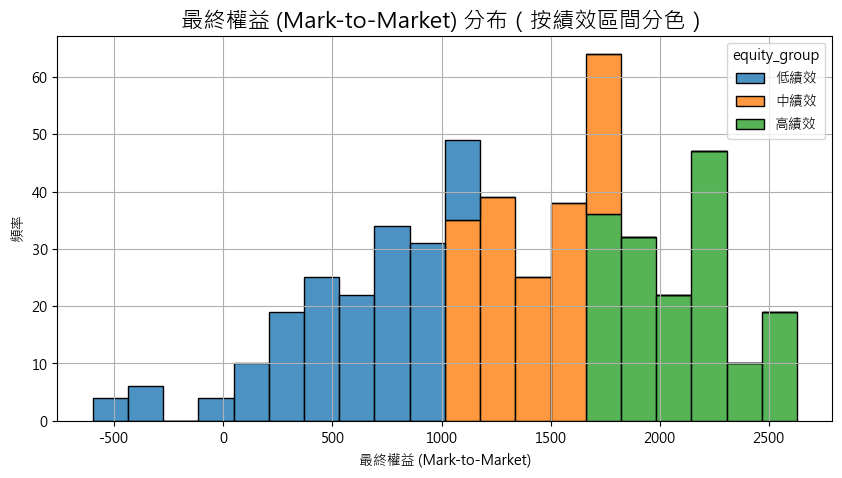

不同績效區間的策略參數中位數：


,short_ma_period,long_ma_period
equity_group,,
低績效,7.0,18.0
中績效,5.0,14.0
高績效,7.0,12.0


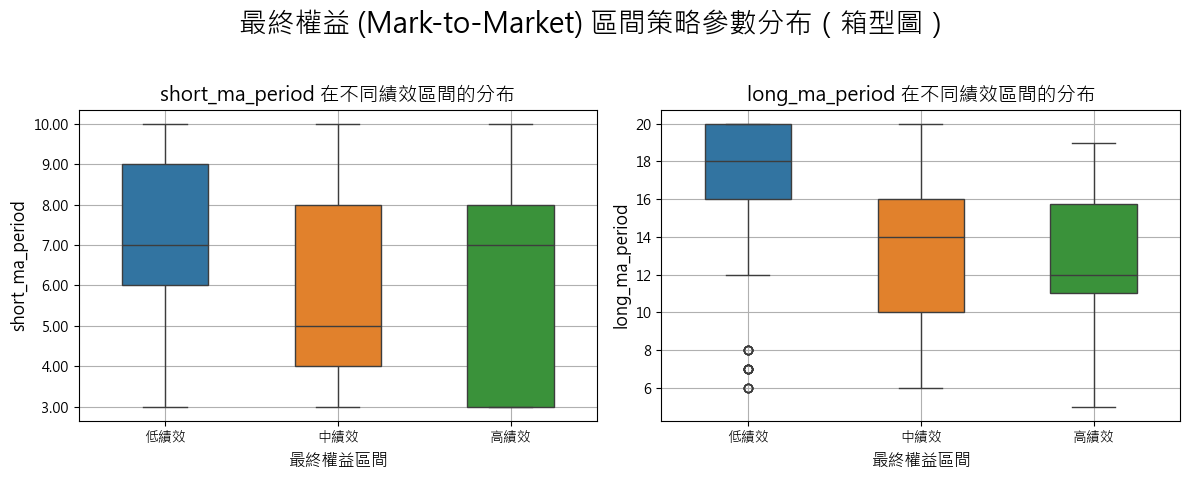

In [5]:
%reload_ext autoreload
%autoreload 2

from lib.backtest.backtest_adjusted import plot_strategy_sensitivity


plot_strategy_sensitivity(
    results_df,
    equity_col='最終權益 (Mark-to-Market)',
    param_cols=['short_ma_period','long_ma_period'],
    group_labels=['低績效','中績效','高績效'],
    subplot_shape=(1, 2)
)


### sample one - module three

In [5]:
%reload_ext autoreload
%autoreload 2

from lib.backtest.strategy_three import backtest_strategy_three
from lib.performance_analysis import calculate_strategy_performance
from lib.backtest.backtest_adjusted import sensitivity_analysis_three
import pandas as pd

# 載入資料
df_original = pd.read_csv("../data/TPE-sample1.csv", encoding="utf-8")
print(f"資料載入成功，共 {len(df_original)} 筆。")

results_df = sensitivity_analysis_three(
    df_original=df_original,
    backtest_func=backtest_strategy_three,
    performance_func=calculate_strategy_performance,
    param_ranges = {
        'ma_short': (1, 10),
        'ma_medium': (4, 15),
        'ma_long': (8, 20)
    },
    iterations=500,
)
results_df

資料載入成功，共 1261 筆。
準備進行 500 次隨機參數測試...


執行進度:   0%|          | 0/500 [00:00<?, ?it/s]

,ma_short,ma_medium,ma_long,最終權益 (Mark-to-Market),淨利或淨損 (已實現),最大回撤 (MDD),總獲利 (已實現),總損失 (已實現),總交易次數,賺錢交易次數,虧錢交易次數,勝率,單次交易最大獲利,單次交易最大損失,獲利交易中的平均獲利,損失交易中的平均損失,賺賠比,最長的連續性獲利的次數,最長的連續性損失的次數
0,3,9,12,709.0,693.0,1233.0,4491.0,-3798.0,61,29,32,47.54%,883.0,-347.0,154.862069,-118.687500,1.304788,4,4
1,3,9,17,224.0,246.0,1530.0,3006.0,-2760.0,56,27,29,48.21%,580.0,-347.0,111.333333,-95.172414,1.169807,3,7
2,7,13,16,372.0,356.0,1636.0,2959.0,-2603.0,48,23,25,47.92%,637.0,-327.0,128.652174,-104.120000,1.235614,7,5
3,4,5,15,1462.0,1446.0,906.0,5269.0,-3823.0,107,55,52,51.40%,362.0,-347.0,95.800000,-73.519231,1.303060,8,5
4,4,8,11,126.0,83.0,1569.0,4472.0,-4389.0,65,30,35,46.15%,902.0,-352.0,149.066667,-125.400000,1.188729,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1,8,13,129.0,151.0,1118.0,4731.0,-4580.0,91,32,59,35.16%,803.0,-205.0,147.843750,-77.627119,1.904537,3,7
496,5,9,11,-1097.0,-1113.0,2130.0,4048.0,-5161.0,65,29,36,44.62%,842.0,-470.0,139.586207,-143.361111,0.973669,3,7
497,7,10,17,485.0,507.0,889.0,3452.0,-2945.0,62,35,27,56.45%,497.0,-367.0,98.628571,-109.074074,0.904235,5,3
498,1,9,19,264.0,174.0,1078.0,3794.0,-3620.0,82,30,52,36.59%,472.0,-298.0,126.466667,-69.615385,1.816648,4,9


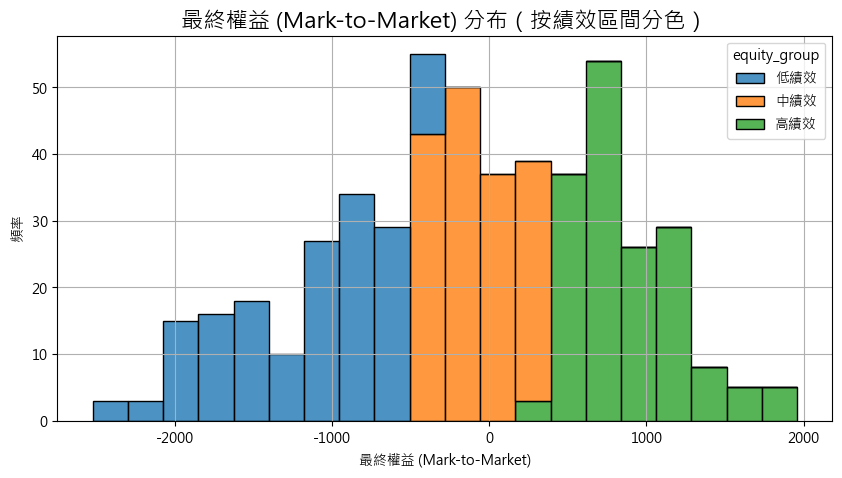

不同績效區間的策略參數中位數：


,ma_short,ma_medium,ma_long
equity_group,,,
低績效,5.0,12.0,17.0
中績效,5.0,11.0,16.0
高績效,2.0,8.0,14.0


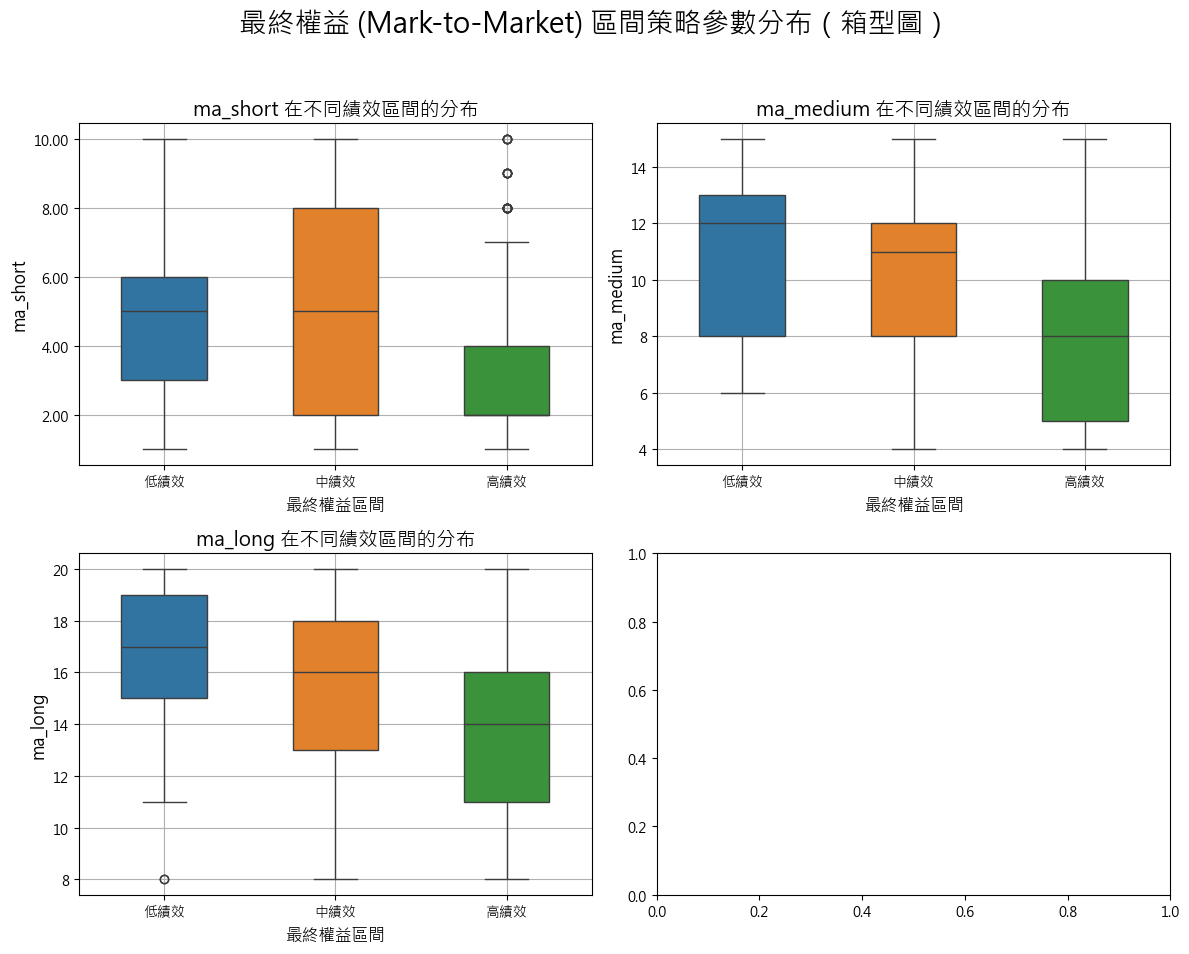

In [6]:
%reload_ext autoreload
%autoreload 2

from lib.backtest.backtest_adjusted import plot_strategy_sensitivity


plot_strategy_sensitivity(
    results_df,
    equity_col='最終權益 (Mark-to-Market)',
    param_cols=['ma_short','ma_medium','ma_long'],
    group_labels=['低績效','中績效','高績效'],
    subplot_shape=(2, 2)
)
